#  Corona vaccine progress 
version 0.82 created by Magnus Sälgö [twitter](https://twitter.com/salgo60), [Linked in](https://www.linkedin.com/in/magnus-s%C3%A4lg%C3%B6-148890/)

* [this Notebook](https://github.com/salgo60/CoronaVaccinationCheck/blob/master/Check%20Corona%20Vaccination.ipynb) / [repository](https://github.com/salgo60/CoronaVaccinationCheck) 

* read the data from [github.com/owid/covid-19-data...vaccinations/country_data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations/country_data) and Wikidata
  * Data is reported cummulated for United Kingdom but also subnational data England, Scotland, Northern Ireland, Wales see [issue 228](https://github.com/owid/covid-19-data/issues/228)
     * subnational data have been published quite irregularly so far ==> we filter them out

In [1]:
from datetime import datetime
start_time  = datetime.now()
print("Last run: ", start_time)

Last run:  2020-12-30 12:32:15.289706


In [2]:
import pandas as pd
GITHUB_directory = "https://api.github.com/repos/owid/covid-19-data/contents/public/data/vaccinations/country_data"  
countries = pd.read_json(GITHUB_directory)  
listcountries = []
for index,row in countries.iterrows():
    df = pd.read_csv(row["download_url"])
    listcountries.append(df)
    
allCountriesGitHub = pd.concat(listcountries, axis=0, ignore_index=True)    

In [3]:
GITHUB_location_csv = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/locations.csv"  
countries_csv = pd.read_csv(GITHUB_location_csv)  


In [4]:
countries_csv

,location,iso_code,source_name,source_website,vaccines,last_observation_date
0,Bahrain,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2020-12-29
1,Bulgaria,BGR,Ministry of Health,https://www.dnes.bg/politika/2020/12/29/prof-a...,Pfizer/BioNTech,2020-12-29
2,Canada,CAN,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada,Pfizer/BioNTech,2020-12-29
3,Chile,CHL,Department of Statistics and Health Information,https://deis.minsal.cl/,Pfizer/BioNTech,2020-12-27
4,China,CHN,National Health Commission,https://www.bloomberg.com/news/articles/2020-1...,"CNBG, Sinovac",2020-12-19
5,Costa Rica,CRI,Government of Costa Rica,https://www.presidencia.go.cr/comunicados/2020...,Pfizer/BioNTech,2020-12-24
6,Denmark,DNK,Statens Serum Institut,https://covid19.ssi.dk/overvagningsdata/vaccin...,Pfizer/BioNTech,2020-12-28
7,England,NaN,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,Pfizer/BioNTech,2020-12-20
8,Estonia,EST,National Health Board,https://www.terviseamet.ee/et/uudised/covid-19...,Pfizer/BioNTech,2020-12-29
9,Germany,DEU,Robert Koch Institut,https://www.rki.de/DE/Content/InfAZ/N/Neuartig...,Pfizer/BioNTech,2020-12-28


In [5]:
# merge allCountriesGitHub with all Countries_csv
allCountries = pd.merge(allCountriesGitHub,countries_csv,how='outer',on="location",indicator=True)
# Show 15 latest sorted by dates
allCountries.sort_values(by=['date'],ascending=False)[0:15]

,location,date,vaccine,total_vaccinations,source_url,iso_code,source_name,source_website,vaccines,last_observation_date,_merge
55,Mexico,2020-12-29,Pfizer/BioNTech,18529,https://www.gob.mx/salud/prensa/273-se-han-apl...,MEX,Secretary of Health,https://www.gob.mx/salud/prensa/273-se-han-apl...,Pfizer/BioNTech,2020-12-29,both
22,Canada,2020-12-29,Pfizer/BioNTech,71725,https://github.com/ishaberry/Covid19Canada/blo...,CAN,COVID-19 Canada Open Data Working Group,https://github.com/ishaberry/Covid19Canada,Pfizer/BioNTech,2020-12-29,both
47,Israel,2020-12-29,Pfizer/BioNTech,643600,https://twitter.com/YuliEdelstein/status/13441...,ISR,Government of Israel,https://twitter.com/YuliEdelstein/status/13441...,Pfizer/BioNTech,2020-12-29,both
50,Latvia,2020-12-29,Pfizer/BioNTech,573,https://twitter.com/ltvzinas/status/1343963079...,LVA,Ministry of Health,https://twitter.com/ltvzinas/status/1343963079...,Pfizer/BioNTech,2020-12-29,both
61,Portugal,2020-12-29,Pfizer/BioNTech,16701,https://www.sns.gov.pt/noticias/2020/12/29/qua...,PRT,National Health Service,https://www.sns.gov.pt/noticias/2020/12/29/qua...,Pfizer/BioNTech,2020-12-29,both
63,Romania,2020-12-29,Pfizer/BioNTech,2778,https://vaccinare-covid.gov.ro/actualizare-zil...,ROU,Government of Romania,https://vaccinare-covid.gov.ro/comunicate-ofic...,Pfizer/BioNTech,2020-12-29,both
58,Oman,2020-12-29,Pfizer/BioNTech,1717,https://twitter.com/OmaniMOH/status/1343855386...,OMN,Ministry of Health,https://twitter.com/OmaniMOH/status/1343855386...,Pfizer/BioNTech,2020-12-29,both
33,Estonia,2020-12-29,Pfizer/BioNTech,516,https://www.terviseamet.ee/et/uudised/covid-19...,EST,National Health Board,https://www.terviseamet.ee/et/uudised/covid-19...,Pfizer/BioNTech,2020-12-29,both
7,Bulgaria,2020-12-29,Pfizer/BioNTech,1719,https://www.dnes.bg/politika/2020/12/29/prof-a...,BGR,Ministry of Health,https://www.dnes.bg/politika/2020/12/29/prof-a...,Pfizer/BioNTech,2020-12-29,both
6,Bahrain,2020-12-29,Sinopharm,56041,https://twitter.com/MOH_Bahrain/status/1343999...,BHR,Ministry of Health,https://twitter.com/MOH_Bahrain,Sinopharm,2020-12-29,both


In [6]:
#Countries in list
allCountries["location"].value_counts()

Canada              15
Israel              10
Bahrain              7
United States        6
Mexico               4
Chile                4
United Kingdom       2
Northern Ireland     2
Portugal             2
Scotland             2
Wales                2
Estonia              2
Romania              2
Hungary              2
Denmark              2
Germany              2
Russia               2
England              1
Lithuania            1
Kuwait               1
Oman                 1
Latvia               1
China                1
Bulgaria             1
Costa Rica           1
Italy                1
Poland               1
Name: location, dtype: int64

In [7]:
allCountries.groupby(["location", "vaccine"]).size()

location          vaccine                 
Bahrain           Sinopharm                    7
Bulgaria          Pfizer/BioNTech              1
Canada            Pfizer/BioNTech             15
Chile             Pfizer/BioNTech              4
China             CNBG, Sinovac                1
Costa Rica        Pfizer/BioNTech              1
Denmark           Pfizer/BioNTech              2
England           Pfizer/BioNTech              1
Estonia           Pfizer/BioNTech              2
Germany           Pfizer/BioNTech              2
Hungary           Pfizer/BioNTech              2
Israel            Pfizer/BioNTech             10
Italy             Pfizer/BioNTech              1
Kuwait            Pfizer/BioNTech              1
Latvia            Pfizer/BioNTech              1
Lithuania         Pfizer/BioNTech              1
Mexico            Pfizer/BioNTech              4
Northern Ireland  Pfizer/BioNTech              2
Oman              Pfizer/BioNTech              1
Poland            Pfizer/B

In [8]:
allCountries['date'] = allCountries['date'].astype('datetime64[ns]')   

# Filter away Wales , England, Scotland see above and [issue 228](https://github.com/owid/covid-19-data/issues/228)
list_of_countries_to_delete = ["England","Northern Ireland","Scotland","Wales"]

allCountriesFiltered = allCountries[~allCountries["location"].isin(list_of_countries_to_delete)]
allCountriesFiltered.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 0 to 75
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   location               71 non-null     object        
 1   date                   71 non-null     datetime64[ns]
 2   vaccine                71 non-null     object        
 3   total_vaccinations     71 non-null     int64         
 4   source_url             71 non-null     object        
 5   iso_code               71 non-null     object        
 6   source_name            71 non-null     object        
 7   source_website         71 non-null     object        
 8   vaccines               71 non-null     object        
 9   last_observation_date  71 non-null     object        
 10  _merge                 71 non-null     category      
dtypes: category(1), datetime64[ns](1), int64(1), object(8)
memory usage: 6.3+ KB


In [9]:
#Reported numbers are accumulated --> get latest
plotLatestCountries = allCountriesFiltered.sort_values(by=['date'],ascending=False) \
    [['total_vaccinations','location','vaccine','iso_code']].groupby('location').apply(lambda x: x.head(1))
plotLatestCountries = plotLatestCountries.set_index('location')
worldtotal_vaccinations_str = '{:,}'.format(plotLatestCountries.sum()["total_vaccinations"]).replace(',', ' ')
print(worldtotal_vaccinations_str, plotLatestCountries.shape)


4 868 073 (23, 3)


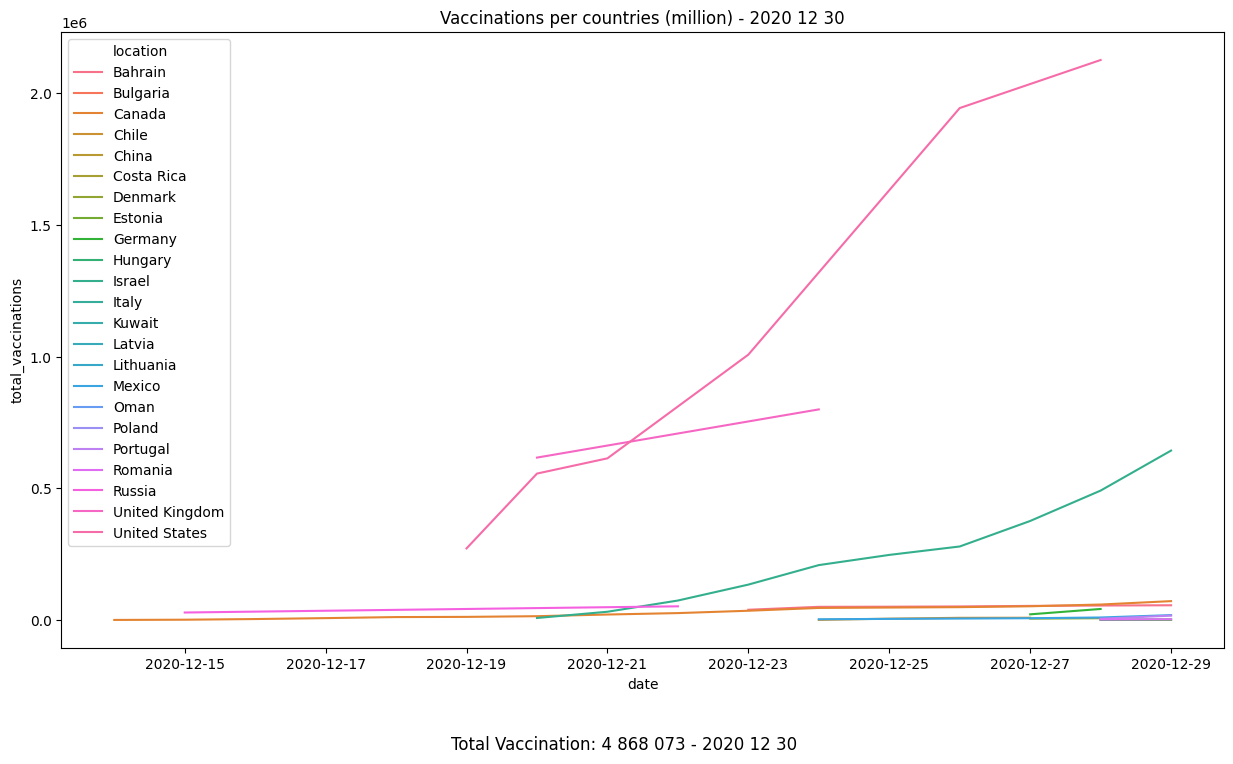

In [10]:
# plot all values = allCountriesFiltered
%matplotlib inline    
import matplotlib.pyplot as plt   
import seaborn as sns
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 8.0)

sns.lineplot(data=allCountriesFiltered, x="date", y="total_vaccinations", hue="location" )
plt.title("Vaccinations per countries (million) - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str  + " - " + start_time.strftime('%Y %m %d'),y=0)

plt.savefig('images/Corona_Line.png',bbox_inches='tight')  
plt.show() 


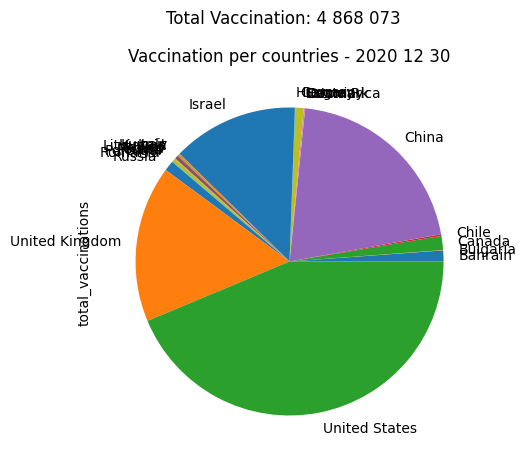

In [11]:
# Plot filtered
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (5, 5)
plotLatestCountries["total_vaccinations"].plot( y='location',kind = 'pie') 
plt.title("Vaccination per countries - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperCountry.png')  
plt.show() 


In [12]:
plotLatestCountries.sort_values(by='total_vaccinations',ascending=True)

,total_vaccinations,vaccine,iso_code
location,,,
Costa Rica,55,Pfizer/BioNTech,CRI
Estonia,516,Pfizer/BioNTech,EST
Latvia,573,Pfizer/BioNTech,LVA
Oman,1717,Pfizer/BioNTech,OMN
Bulgaria,1719,Pfizer/BioNTech,BGR
Poland,2000,Pfizer/BioNTech,POL
Lithuania,2270,Pfizer/BioNTech,LTU
Hungary,2461,Pfizer/BioNTech,HUN
Kuwait,2500,Pfizer/BioNTech,KWT


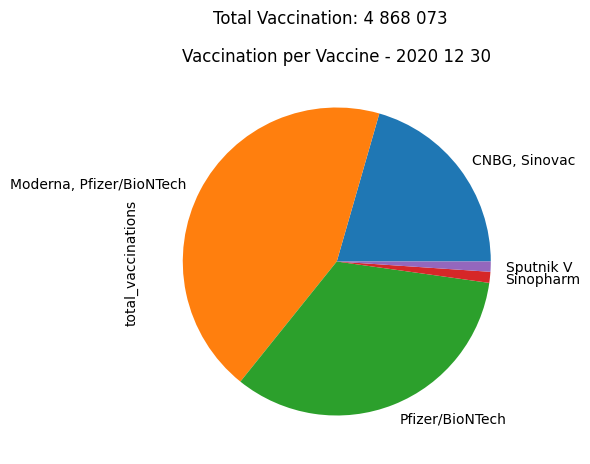

In [13]:
# Vaccine numbers
plotVaccine = plotLatestCountries.groupby('vaccine')['total_vaccinations'].sum()
plotVaccine.plot( kind = 'pie') 
plt.title("Vaccination per Vaccine - " + start_time.strftime('%Y %m %d'))
plt.suptitle("Total Vaccination: " + worldtotal_vaccinations_str ,y=1)
plt.savefig('images/Corona_VaccinationperVaccine.png')  
plt.show()

In [14]:
plotVaccine.sort_values(ascending=True)

vaccine
Sputnik V                     52000
Sinopharm                     56041
CNBG, Sinovac               1000000
Pfizer/BioNTech             1632889
Moderna, Pfizer/BioNTech    2127143
Name: total_vaccinations, dtype: int64

In [15]:
# Sweden have 10 000 doses....
#allCountries

In [16]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-30 12:32:28.889316
Time elapsed (hh:mm:ss.ms) 0:00:13.599914


### Whole dataset
see 
* [COVID-19 Data Processing Pipelines and datasets](https://github.com/covid19-data/covid19-data)

### Compare population
* using data from Wikidata


In [17]:
import sys,json
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"
 
# https://w.wiki/sFn
queryWD = """SELECT DISTINCT ?cid  (SAMPLE(?continent) AS ?continent)  (SAMPLE(?memberEU) AS ?memberEU)  (SAMPLE(?democracy) AS ?democracy) ?country 
(REPLACE(STR(?cid), ".*Q", "Q") AS ?qid) ?population ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index 
?G8 ?G20 ?IMF WHERE {
  ?cid wdt:P31 wd:Q3624078;
    wdt:P1082 ?population.
  OPTIONAL { ?cid wdt:P298 ?ISO3166_1. }
  OPTIONAL { ?cid wdt:P2132 ?nominalGDPperCapita. }
  OPTIONAL { ?cid wdt:P2299 ?PPP_GDP_per_capita. }
  OPTIONAL { ?cid wdt:P1081 ?Human_Development_Index. }
  BIND (exists{?cid wdt:P463 wd:Q458} AS ?memberEU)
  BIND (exists{?cid wdt:P463 wd:Q37143} AS ?G8)
  BIND (exists{?cid wdt:P463 wd:Q19771} AS ?G20)
  BIND (exists{?cid wdt:P463 wd:Q19771} AS ?IMF)
  BIND (exists{?cid wdt:P122/wdt:P279* wd:Q7174} AS ?democracy)
  {?cid wdt:P30 ?contid}
  OPTIONAL {
    ?contid rdfs:label ?continent.
    FILTER((LANG(?continent)) = "en")
    ?cid rdfs:label ?country.
    FILTER((LANG(?country)) = "en")
  }

SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}
GROUP BY ?population ?countryLabel ?country ?ISO3166_1 ?nominalGDPperCapita ?PPP_GDP_per_capita ?Human_Development_Index ?cid  
?G8 ?G20 ?IMF"""


def get_sparql_dataframe(endpoint_url, query):
    """
    Helper function to convert SPARQL results into a Pandas data frame.
    """
    user_agent = "salgo60/%s.%s" % (sys.version_info[0], sys.version_info[1])
 
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    result = sparql.query()

    processed_results = json.load(result.response)
    cols = processed_results['head']['vars']

    out = []
    for row in processed_results['results']['bindings']:
        item = []
        for c in cols:
            item.append(row.get(c, {}).get('value'))
        out.append(item)

    return pd.DataFrame(out, columns=cols)

WDpopulation = get_sparql_dataframe(endpoint_url, queryWD)
WDpopulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cid                      195 non-null    object
 1   continent                195 non-null    object
 2   memberEU                 195 non-null    object
 3   democracy                195 non-null    object
 4   country                  195 non-null    object
 5   qid                      195 non-null    object
 6   population               195 non-null    object
 7   ISO3166_1                195 non-null    object
 8   nominalGDPperCapita      191 non-null    object
 9   PPP_GDP_per_capita       185 non-null    object
 10  Human_Development_Index  186 non-null    object
 11  G8                       195 non-null    object
 12  G20                      195 non-null    object
 13  IMF                      195 non-null    object
dtypes: object(14)
memory usage: 21.5+ KB


In [18]:
WDpopulation.sample(5)

,cid,continent,memberEU,democracy,country,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,G8,G20,IMF
47,http://www.wikidata.org/entity/Q733,South America,false,false,Paraguay,Q733,6811297,PRY,5823,13109.344,0.702,false,false,false
126,http://www.wikidata.org/entity/Q424,Asia,false,false,Cambodia,Q424,16005373,KHM,1384,4017.571,0.582,false,false,false
115,http://www.wikidata.org/entity/Q1006,Africa,false,true,Guinea,Q1006,12717176,GIN,823,2247.02,0.459,false,false,false
150,http://www.wikidata.org/entity/Q826,Asia,false,false,Maldives,Q826,436330,MDV,11151,16688.213,0.717,false,false,false
118,http://www.wikidata.org/entity/Q822,Asia,false,false,Lebanon,Q822,6100075,LBN,8808,14512.689,0.757,false,false,false


In [19]:
plotLatestCountries

,total_vaccinations,vaccine,iso_code
location,,,
Bahrain,56041,Sinopharm,BHR
Bulgaria,1719,Pfizer/BioNTech,BGR
Canada,71725,Pfizer/BioNTech,CAN
Chile,8647,Pfizer/BioNTech,CHL
China,1000000,"CNBG, Sinovac",CHN
Costa Rica,55,Pfizer/BioNTech,CRI
Denmark,6775,Pfizer/BioNTech,DNK
Estonia,516,Pfizer/BioNTech,EST
Germany,41962,Pfizer/BioNTech,DEU


In [20]:
#plotCountriesPopulation = pd.merge(plotLatestCountries, reconciliationCountries,how='outer', left_index=True, right_index=True,indicator=True)   
CountriesData = pd.merge(plotLatestCountries, WDpopulation,how='inner', left_on="iso_code", right_on="ISO3166_1" ,indicator=True)   
CountriesData

,total_vaccinations,vaccine,iso_code,cid,continent,memberEU,democracy,country,qid,population,ISO3166_1,nominalGDPperCapita,PPP_GDP_per_capita,Human_Development_Index,G8,G20,IMF,_merge
0,56041,Sinopharm,BHR,http://www.wikidata.org/entity/Q398,Asia,false,false,Bahrain,Q398,1492584,BHR,23739,47708.055,0.824,false,false,false,both
1,1719,Pfizer/BioNTech,BGR,http://www.wikidata.org/entity/Q219,Europe,true,false,Bulgaria,Q219,7000039,BGR,8228,20948.097,0.782,false,false,false,both
2,71725,Pfizer/BioNTech,CAN,http://www.wikidata.org/entity/Q16,North America,false,false,Canada,Q16,37894799,CAN,44870,46509.717,0.926,true,true,true,both
3,8647,Pfizer/BioNTech,CHL,http://www.wikidata.org/entity/Q298,South America,false,true,Chile,Q298,18054726,CHL,15346,24747.307,0.832,false,false,false,both
4,1000000,"CNBG, Sinovac",CHN,http://www.wikidata.org/entity/Q148,Asia,false,true,People's Republic of China,Q148,1409517397,CHN,8826,16842.408,0.752,false,true,true,both
5,55,Pfizer/BioNTech,CRI,http://www.wikidata.org/entity/Q800,North America,false,false,Costa Rica,Q800,4905769,CRI,11677,17109.751,0.794,false,false,false,both
6,6775,Pfizer/BioNTech,DNK,http://www.wikidata.org/entity/Q35,Europe,true,false,Denmark,Q35,5827463,DNK,57218,54356.448,0.929,false,false,false,both
7,6775,Pfizer/BioNTech,DNK,http://www.wikidata.org/entity/Q756617,Europe,false,false,Danish Realm,Q756617,5930987,DNK,None,None,None,false,false,false,both
8,516,Pfizer/BioNTech,EST,http://www.wikidata.org/entity/Q191,Europe,true,true,Estonia,Q191,1324820,EST,20200,33447.828,0.861,false,false,false,both
9,41962,Pfizer/BioNTech,DEU,http://www.wikidata.org/entity/Q183,Europe,true,true,Germany,Q183,83149300,DEU,44665,52555.933,0.926,true,true,true,both


In [21]:
#del CountriesData['country']
#del CountriesData['qid']
#del CountriesData['_merge']

CountriesData['population'] = CountriesData['population'].astype(int)
CountriesData['nominalGDPperCapita'] = CountriesData['nominalGDPperCapita'].astype(float)
CountriesData['PPP_GDP_per_capita'] = CountriesData['PPP_GDP_per_capita'].astype(float)
CountriesData['Human_Development_Index'] = CountriesData['Human_Development_Index'].astype(float)
CountriesData["memberEU"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['memberEU'] = CountriesData['memberEU'].astype(int)
CountriesData["democracy"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData["democracy"] = CountriesData['democracy'].astype(int)
# G8 G20 IMF
CountriesData["G8"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G8'] = CountriesData['G8'].astype(int)
CountriesData["G20"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['G20'] = CountriesData['G20'].astype(int)
CountriesData["IMF"].replace({"true": "1", "false": "0"}, inplace=True)
CountriesData['IMF'] = CountriesData['IMF'].astype(int)

#"Correct United States of America
CountriesData["continent"].replace({"Oceania": "North America"}, inplace=True)
CountriesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   total_vaccinations       24 non-null     int64   
 1   vaccine                  24 non-null     object  
 2   iso_code                 24 non-null     object  
 3   cid                      24 non-null     object  
 4   continent                24 non-null     object  
 5   memberEU                 24 non-null     int64   
 6   democracy                24 non-null     int64   
 7   country                  24 non-null     object  
 8   qid                      24 non-null     object  
 9   population               24 non-null     int64   
 10  ISO3166_1                24 non-null     object  
 11  nominalGDPperCapita      23 non-null     float64 
 12  PPP_GDP_per_capita       23 non-null     float64 
 13  Human_Development_Index  23 non-null     float64 
 14  G8          

In [22]:
#CountriesData

In [23]:
CountriesData['Country'] = CountriesData.index

In [24]:
CountriesData["vaccinations_population_percent"] = CountriesData["total_vaccinations"]/CountriesData["population"] * 100

correlations = CountriesData.corr()  
correlations["total_vaccinations"]

total_vaccinations                 1.000000
memberEU                          -0.267568
democracy                          0.189248
population                         0.517997
nominalGDPperCapita                0.474633
PPP_GDP_per_capita                 0.251174
Human_Development_Index            0.292252
G8                                 0.374917
G20                                0.456397
IMF                                0.456397
Country                            0.301624
vaccinations_population_percent    0.243685
Name: total_vaccinations, dtype: float64

In [25]:
correlations["vaccinations_population_percent"]

total_vaccinations                 0.243685
memberEU                          -0.274797
democracy                          0.013481
population                        -0.085200
nominalGDPperCapita                0.274485
PPP_GDP_per_capita                 0.171015
Human_Development_Index            0.246676
G8                                -0.080572
G20                               -0.134488
IMF                               -0.134488
Country                           -0.110573
vaccinations_population_percent    1.000000
Name: vaccinations_population_percent, dtype: float64

In [26]:
# see https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
#plt.rcParams['figure.figsize'] = (8.0, 8.0)
#heatmap = sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)
#heatmap.set_title('Corona vaccinations Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


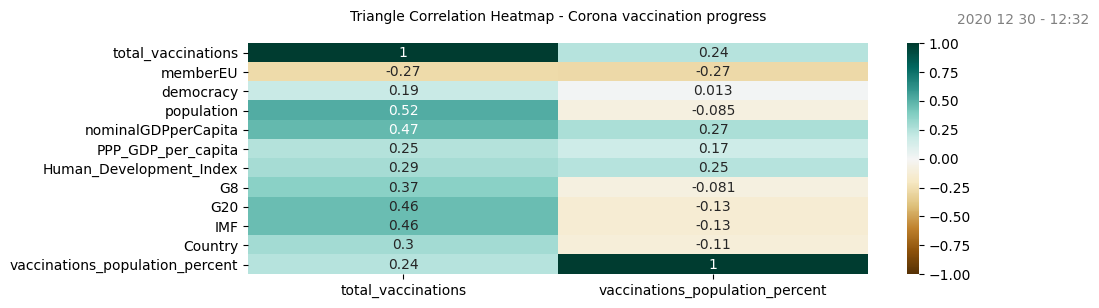

In [27]:
import numpy as np
plt.figure(figsize=(10, 3))
#np.triu(np.ones_like(correlations["total_vaccinations","vaccinations_population_percent"]))
#mask = np.triu(np.ones_like(correlations, dtype=np.bool))
heatmap = sns.heatmap(correlations[{"total_vaccinations","vaccinations_population_percent"}],vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap - Corona vaccination progress', fontdict={'fontsize':10},y=0.9, pad=16);
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M'), fontsize=10,color = 'gray',x=0.9)
plt.savefig('images/Correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show() 


In [28]:
CountriesData = CountriesData.sort_values(by=['vaccinations_population_percent'],ascending=False)
CountriesData[{"total_vaccinations","population","vaccinations_population_percent","continent",
               "memberEU","G8","G20","IMF","country"}]

,total_vaccinations,continent,G8,IMF,memberEU,population,G20,vaccinations_population_percent,country
11,643600,Asia,0,0,0,9093000,0,7.077972,Israel
0,56041,Asia,0,0,0,1492584,0,3.754630,Bahrain
22,800000,Europe,1,1,1,66022273,1,1.211712,United Kingdom
23,2127143,North America,1,1,0,328239523,1,0.648046,United States of America
2,71725,North America,1,1,0,37894799,1,0.189274,Canada
19,16701,Europe,0,0,1,10600000,0,0.157557,Portugal
6,6775,Europe,0,0,1,5827463,0,0.116260,Denmark
7,6775,Europe,0,0,0,5930987,0,0.114231,Danish Realm
15,2270,Europe,0,0,1,2790842,0,0.081337,Lithuania
4,1000000,Asia,0,1,0,1409517397,1,0.070946,People's Republic of China


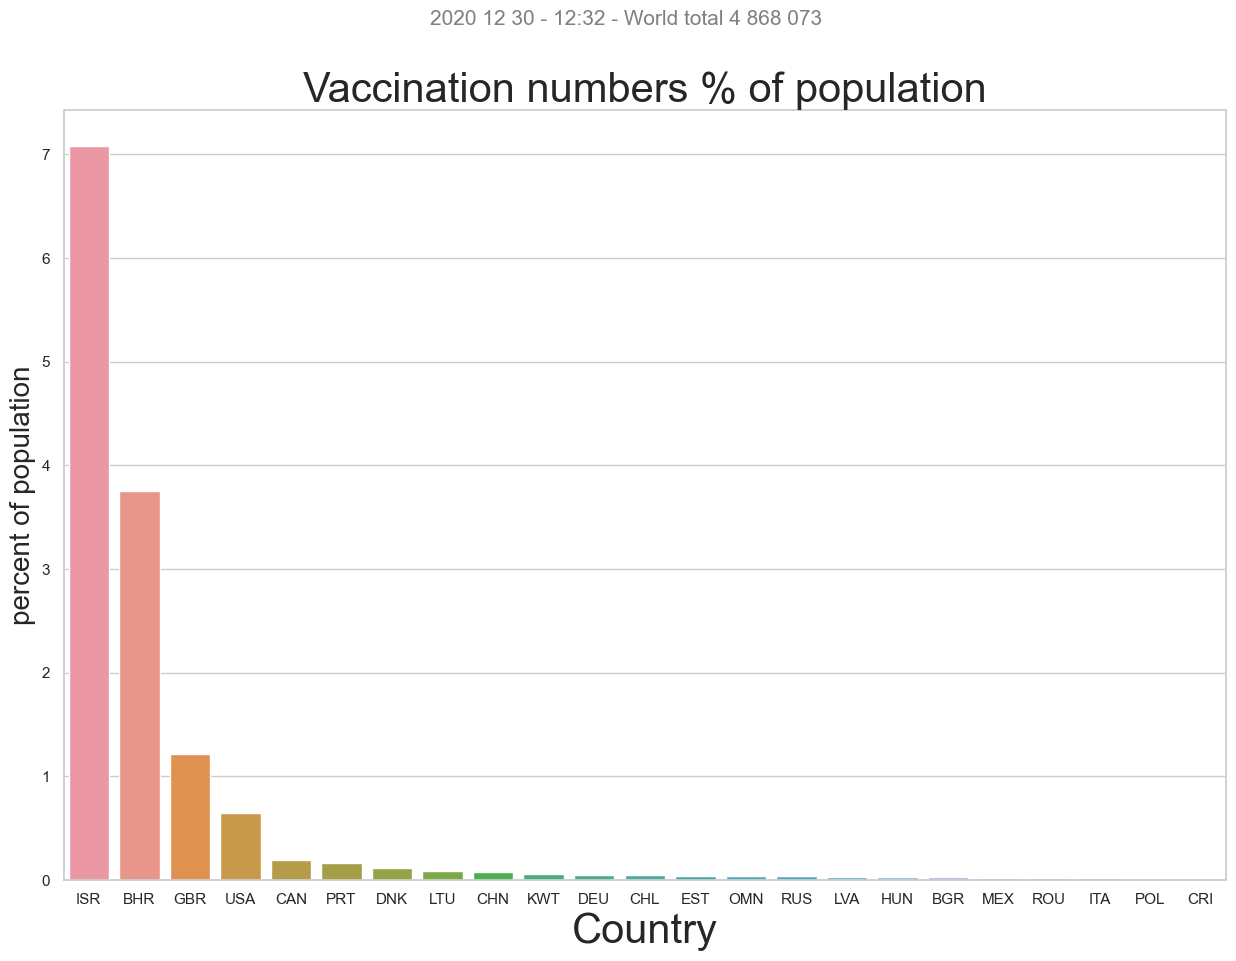

In [29]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData). \
            set_title("Vaccination numbers % of population", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Country",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_2.png",bbox_inches="tight")
plt.show() 

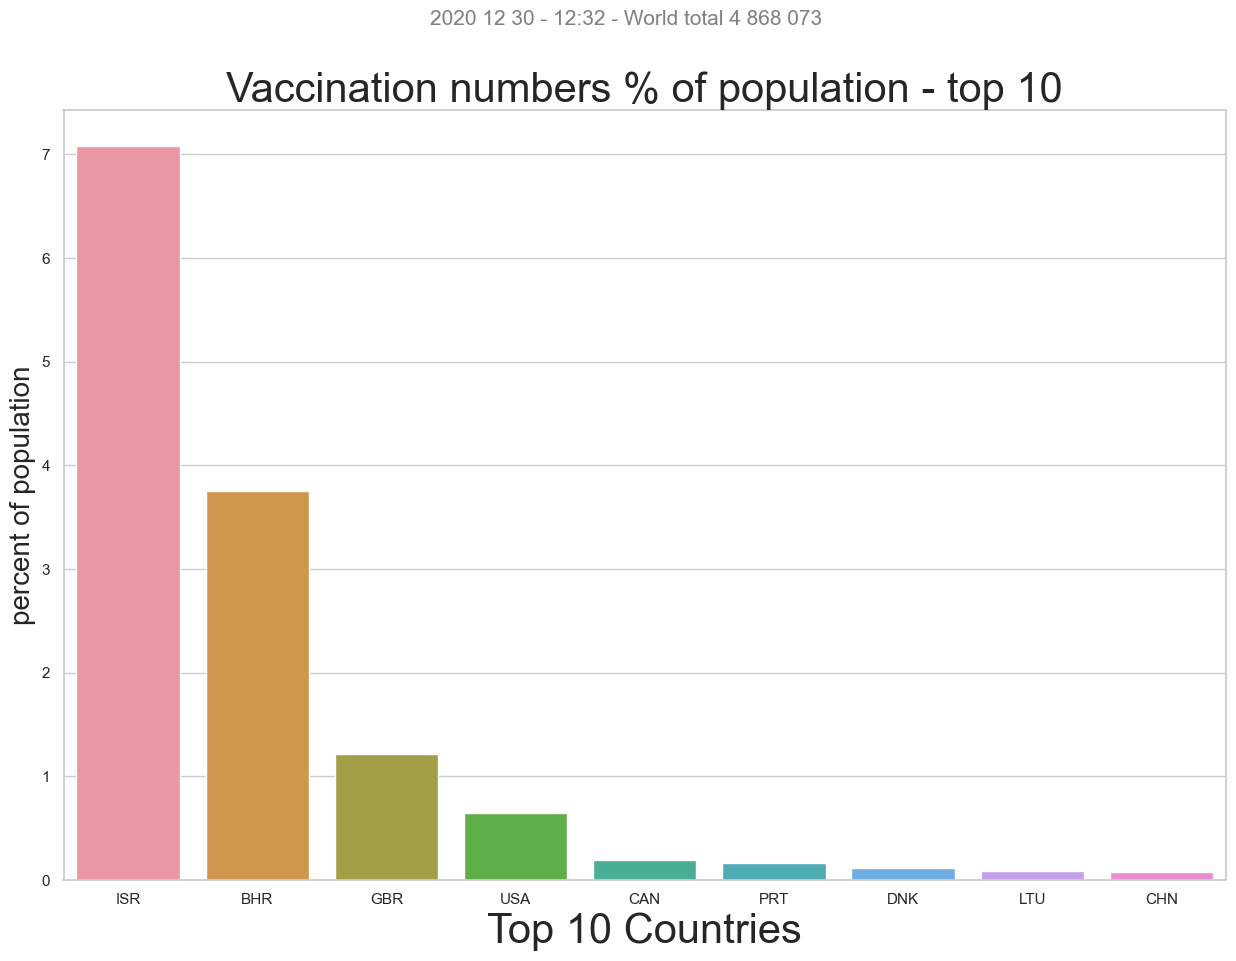

In [30]:
#Top 10 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[0:10]). \
            set_title("Vaccination numbers % of population - top 10", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Top 10 Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_1_10.png",bbox_inches="tight")
plt.show() 

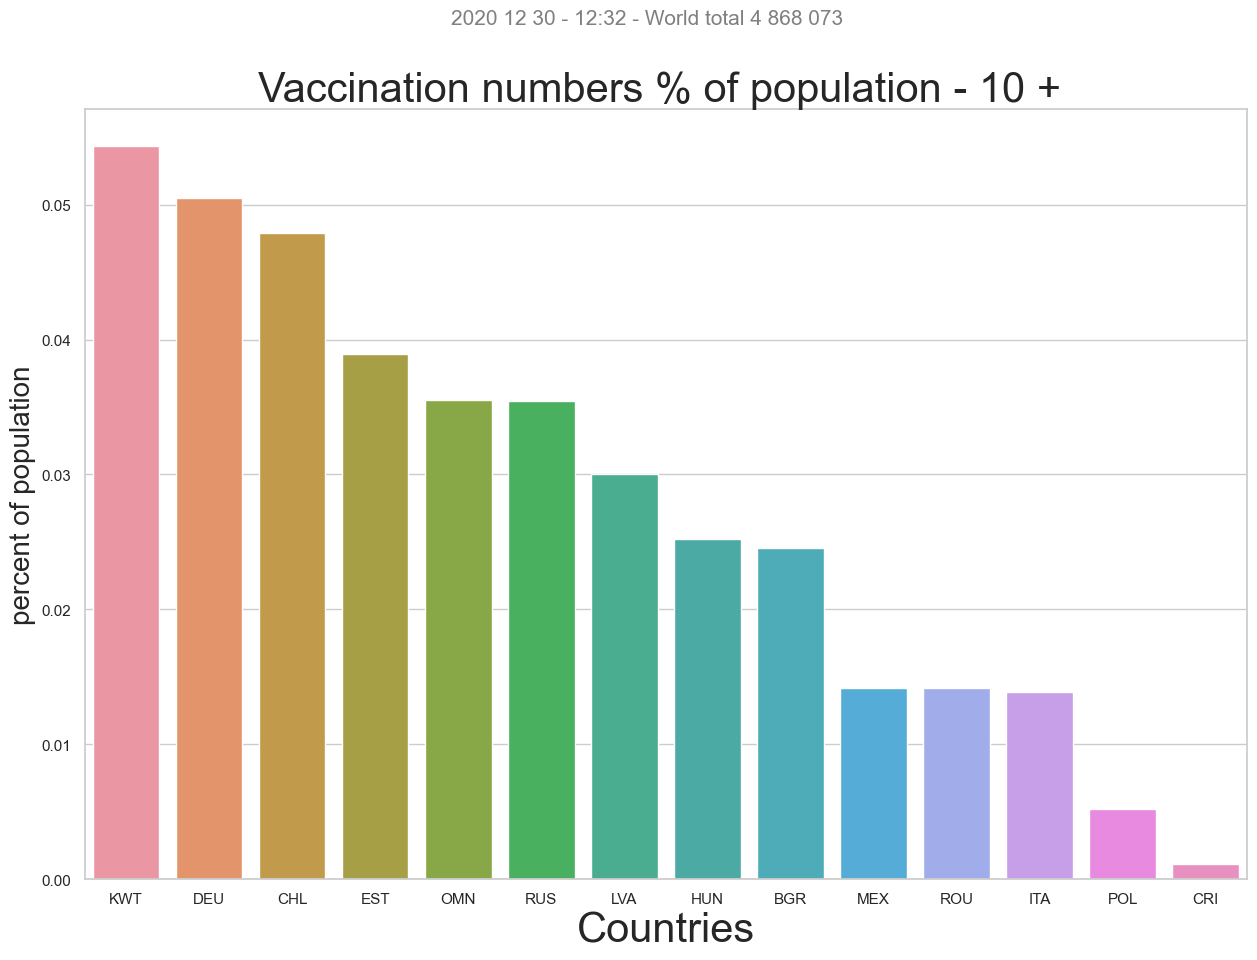

In [31]:
# 10-
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.set(style="whitegrid", palette="rainbow") 
sns.barplot( x = "ISO3166_1",y = "vaccinations_population_percent", data=CountriesData[10:]). \
            set_title("Vaccination numbers % of population - 10 + ", \
                      fontsize=30)
plt.ylabel("percent of population",fontsize=20)
plt.xlabel("Countries",fontsize=30)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), fontsize=15,color = 'gray')
plt.savefig("images/Corona_VaccinationperCountryPopulation_sns_10_.png",bbox_inches="tight")
plt.show() 

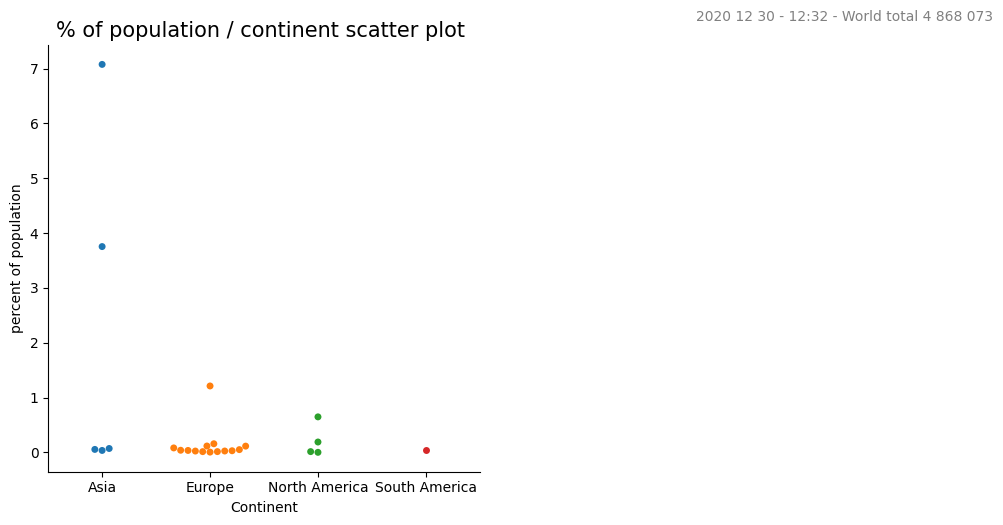

In [32]:
#https://seaborn.pydata.org/tutorial/categorical.html
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% of population / continent scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

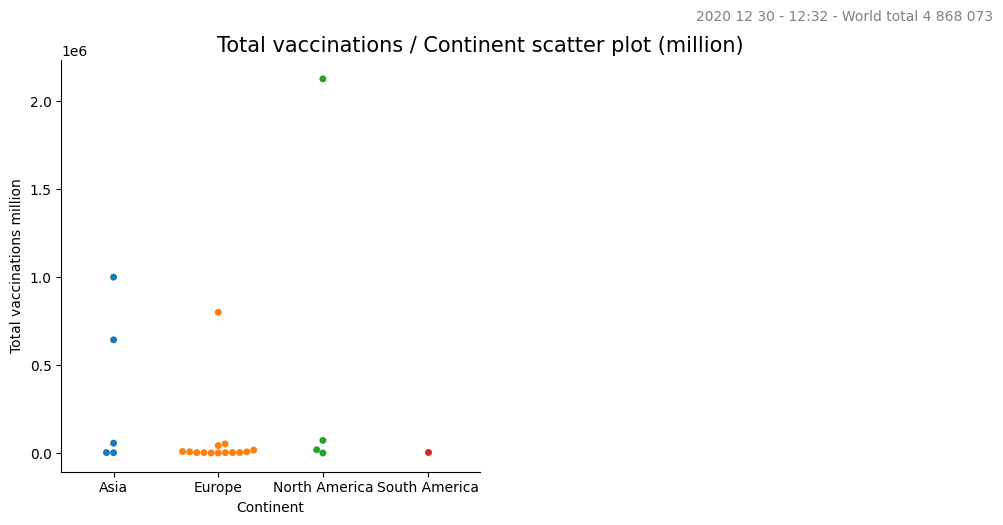

In [33]:
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="continent", y="total_vaccinations", data=CountriesData,kind="swarm",legend='brief')
plt.title("Total vaccinations / Continent scatter plot (million)" , fontsize=15, x=1,y=1.1 )
plt.ylabel("Total vaccinations million",fontsize=10)
plt.xlabel("Continent",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str ), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryTotal_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [34]:
CountriesData["Member EU"] = CountriesData["memberEU"]
CountriesData["Member EU"] = CountriesData["Member EU"].astype(str)
CountriesData["Member EU"].replace({"1": "Member in EU", "0": "non Member"}, inplace=True)

#CountriesData

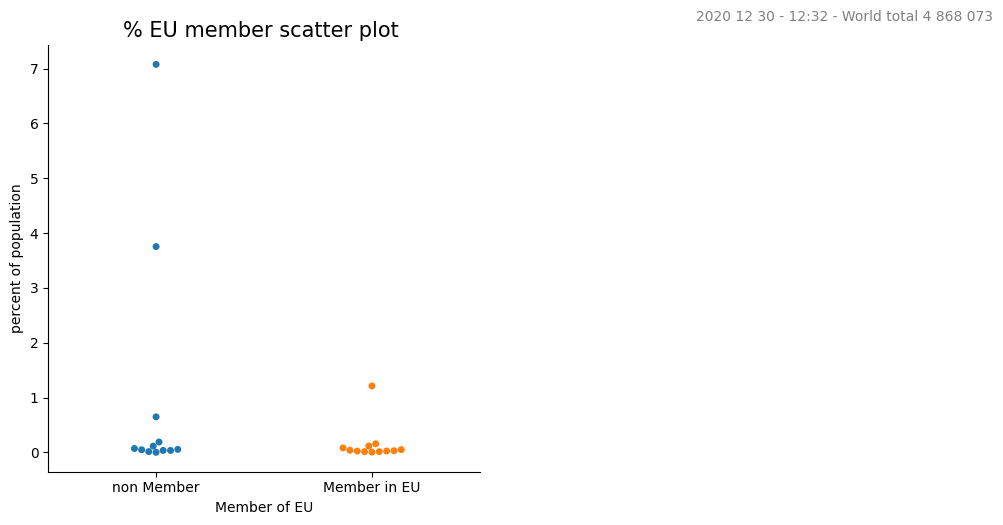

In [35]:

plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member EU", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% EU member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of EU",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_EUCategorical_scatterplot.png",bbox_inches="tight")
plt.show() 

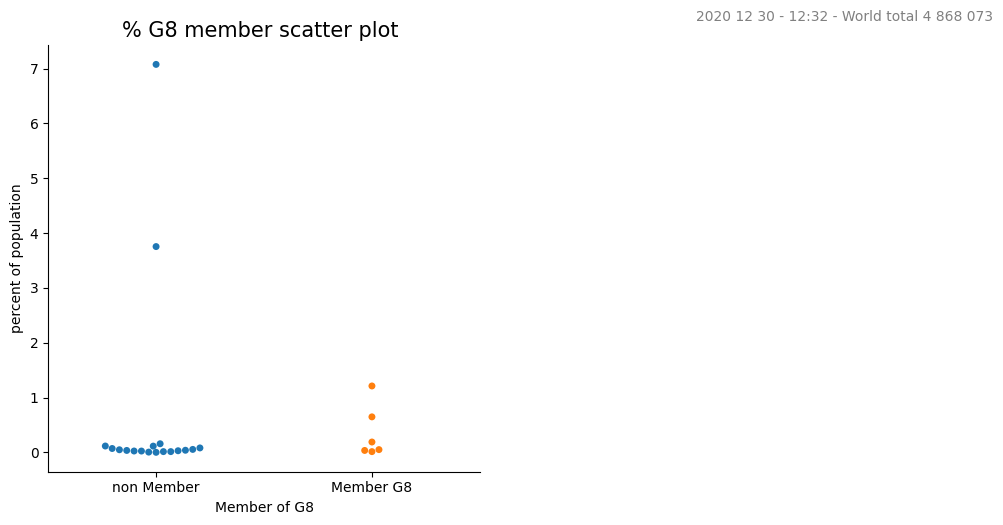

In [36]:
CountriesData["Member G8"] = CountriesData["G8"]
CountriesData["Member G8"] = CountriesData["G8"].astype(str)
CountriesData["Member G8"].replace({"1": "Member G8", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G8", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G8 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G8",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G8_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

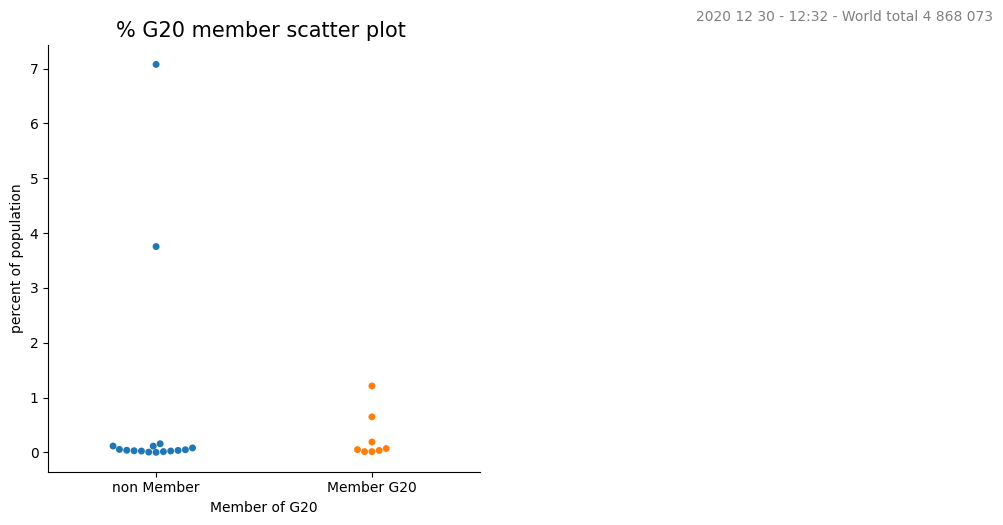

In [37]:
CountriesData["Member G20"] = CountriesData["G20"]
CountriesData["Member G20"] = CountriesData["G20"].astype(str)
CountriesData["Member G20"].replace({"1": "Member G20", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member G20", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% G20 member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of G20",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total '  + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_G20_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

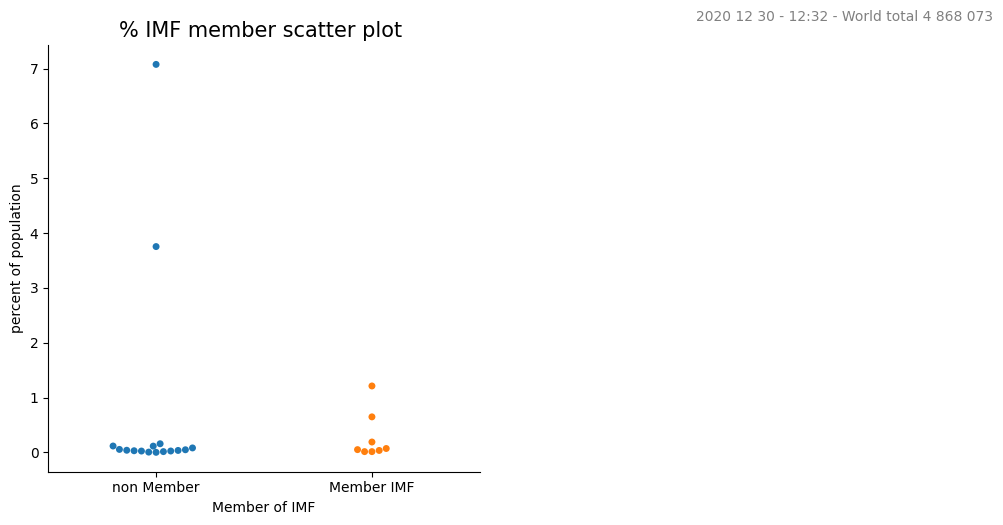

In [38]:
CountriesData["Member IMF"] = CountriesData["IMF"]
CountriesData["Member IMF"] = CountriesData["IMF"].astype(str)
CountriesData["Member IMF"].replace({"1": "Member IMF", "0": "non Member"}, inplace=True)
plt.rcParams.update(plt.rcParamsDefault) 
plt.rcParams['figure.figsize'] = (15.0, 10.0)
sns.color_palette("magma")
sns.catplot(x="Member IMF", y="vaccinations_population_percent", data=CountriesData,kind="swarm",legend='brief')
plt.title("% IMF member scatter plot " , fontsize=15, y=0.9 )
plt.ylabel("percent of population",fontsize=10)
plt.xlabel("Member of IMF",fontsize=10)
plt.suptitle(start_time.strftime('%Y %m %d - %-H:%M - World total ' + worldtotal_vaccinations_str), x=1.7,y=1.04, fontsize=10,color = 'gray')

plt.savefig("images/Corona_VaccinationperCountryPopulation_IMF_Categorical_scatterplot.png",bbox_inches="tight")
plt.show() 

In [39]:
end = datetime.now()
print("Ended: ", end) 
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

Ended:  2020-12-30 12:32:37.710587
Time elapsed (hh:mm:ss.ms) 0:00:22.421425
